In [150]:
import nltk


In [152]:
# SOME BASICS 

In [154]:
import pandas as pd

dataset = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')
df = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')

In [156]:
print(len(dataset))

4000


In [158]:
print(dataset.info())
dataset.head(-10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4000 non-null   int64 
 1   Date Created     4000 non-null   object
 2   Number of Likes  4000 non-null   int64 
 3   Tweet            4000 non-null   object
 4   Sentiment        4000 non-null   object
dtypes: int64(2), object(3)
memory usage: 156.4+ KB
None


,ID,Date Created,Number of Likes,Tweet,Sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral
...,...,...,...,...,...
3985,3986,2022-12-18 18:47:48+00:00,0,The first female referee in the WORLD CUP WOAH,Neutral
3986,3987,2022-12-18 18:45:29+00:00,0,Referee had eagle eyes. The dive in the penalt...,Neutral
3987,3988,2022-12-18 18:44:50+00:00,10,The best World Cup tournament I have ever seen...,Positive
3988,3989,2022-12-18 18:44:31+00:00,2,"Nah let’s keep it real, this was the most rigg...",Negative


In [160]:
dataset.head(5)

,ID,Date Created,Number of Likes,Tweet,Sentiment
0,1,2022-11-21 22:37:33+00:00,5,The first female referee at a Men’s World Cup ...,Neutral
1,2,2022-11-21 22:12:57+00:00,1,North Korea will host the World Cup in 2030. W...,Neutral
2,3,2022-11-21 22:07:05+00:00,7,If you're wondering why there has been so much...,Neutral
3,4,2022-11-21 21:48:16+00:00,1,NFL referee: “We will scrutinize every angle o...,Negative
4,5,2022-11-21 21:38:01+00:00,0,"Possibly imagining it, but feel like there are...",Neutral


In [162]:
print(dataset['Number of Likes'])

0       5
1       1
2       7
3       1
4       0
       ..
3995    8
3996    0
3997    0
3998    0
3999    3
Name: Number of Likes, Length: 4000, dtype: int64


In [164]:
dataset_text = (dataset['Tweet']).to_list()
# print(dataset_text)

In [166]:
raw_dataset_text = "".join(dataset_text[:314])
#raw_dataset_text

In [168]:
words = raw_dataset_text.split(" ")
# print(words)

<h1>Conclusion</h1>
<h3>

In the steps above, I loaded the dataset containing 4,000 tweets related to the FIFA World Cup using pandas. 
I explored its structure with .info() and previewed the data, focusing on tweet text, number of likes, and sentiment labels. 
This allowed me to confirm that the dataset was complete and to extract the raw tweet text for further analysis.

</h3>



In [170]:
# 1. USING THE VADER SENTIMENT ANALYZER TOOL
# 2. USING THAT TOOL, BUT WITH SENTIMENTP - POLARITY SCORES
# 3. MAKING A COMPARISON BETWEEN THESE TWO

In [172]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['sentimentP'] = df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentimentP'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display the results
result_df = df[['Tweet', 'sentiment_class']]
print(result_df)

# Save the DataFrame to a new CSV file
existing_file_path = '/Users/mirsad/Twitter-Data-Analysis-using-NLP/s_sen.csv'  # Replace with the path to your existing CSV file
df.to_csv(existing_file_path, index=False)


                                                  Tweet sentiment_class
0     The first female referee at a Men’s World Cup ...        Negative
1     North Korea will host the World Cup in 2030. W...        Negative
2     If you're wondering why there has been so much...         Neutral
3     NFL referee: “We will scrutinize every angle o...        Negative
4     Possibly imagining it, but feel like there are...        Positive
...                                                 ...             ...
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...        Negative
3996  How wonderful in this day and age.. at the Wor...        Positive
3997  World cup: referees get medals after the final...         Neutral
3998  This argentina the whole journey Copa America ...        Positive
3999  Credit must also go to the Polish referee Marc...        Positive

[4000 rows x 2 columns]


<h1>Conclusion</h1>
<h3>

In this part, I used the VADER SentimentIntensityAnalyzer to assign sentiment scores to each tweet. I then classified each tweet as Positive, Negative, or Neutral based on the compound score. Finally, I saved the updated DataFrame with sentiment predictions to a new CSV file for future analysis.

</h3>

In [174]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
# VADER sentiment analyzer

# Create a SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
 
df['sentimentP'] = df['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral
df['sentiment_class'] = df['sentimentP'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display NLTK VADER sentiment scores and actual sentiment labels
result_df = df[['Tweet', 'sentimentP', 'sentiment_class']]
print(result_df)


                                                  Tweet  sentimentP  \
0     The first female referee at a Men’s World Cup ...     -0.1280   
1     North Korea will host the World Cup in 2030. W...     -0.5258   
2     If you're wondering why there has been so much...      0.0000   
3     NFL referee: “We will scrutinize every angle o...     -0.4871   
4     Possibly imagining it, but feel like there are...      0.5792   
...                                                 ...         ...   
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...     -0.1877   
3996  How wonderful in this day and age.. at the Wor...      0.0191   
3997  World cup: referees get medals after the final...      0.0000   
3998  This argentina the whole journey Copa America ...      0.4404   
3999  Credit must also go to the Polish referee Marc...      0.7845   

     sentiment_class  
0           Negative  
1           Negative  
2            Neutral  
3           Negative  
4           Positive  
...      

<h1>Conclusion</h1>
<h3>

In this section, I applied the VADER sentiment analyzer from NLTK to calculate the compound sentiment score for each tweet. Based on these scores, I classified the tweets as Positive, Negative, or Neutral. I then created a new DataFrame showing each tweet alongside its VADER score and the corresponding sentiment classification.

</h3>

In [190]:
 import pandas as pd

df_original = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')

# Load the new sentiment (VADER) CSV file
df_vader = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/s_sen.csv')

# Display the first 10 rows and count differences
comparison_df = pd.DataFrame({
    'Original_Sentiment': df_original['Sentiment'].head(10),
    'VADER_Sentiment': df_vader['sentiment_class'].head(10),
})

comparison_df['Difference'] = comparison_df['Original_Sentiment'] != comparison_df['VADER_Sentiment']

print(comparison_df, '\n', df['Tweet'])
print("\nCount of Differences:", comparison_df['Difference'].sum())

  Original_Sentiment VADER_Sentiment  Difference
0            Neutral        Negative        True
1            Neutral        Negative        True
2            Neutral         Neutral       False
3           Negative        Negative       False
4            Neutral        Positive        True
5            Neutral        Positive        True
6           Negative        Negative       False
7           Negative        Positive        True
8            Neutral        Negative        True
9           Negative        Negative       False 
 0       The first female referee at a Men’s World Cup ...
1       North Korea will host the World Cup in 2030. W...
2       If you're wondering why there has been so much...
3       NFL referee: “We will scrutinize every angle o...
4       Possibly imagining it, but feel like there are...
                              ...                        
3995    Meanwhile, Mbappe gave us a World Cup we’d nev...
3996    How wonderful in this day and age.. at the Wo

<h1>Conclusion</h1>

<h3>In this part of the project, I loaded both the original dataset and the one enriched with VADER sentiment labels. I compared the first 10 tweets by aligning their original sentiment with the VADER-generated sentiment. Then, I calculated whether there was a difference between the two labels for each tweet and counted how many differences there were in total.</h3>

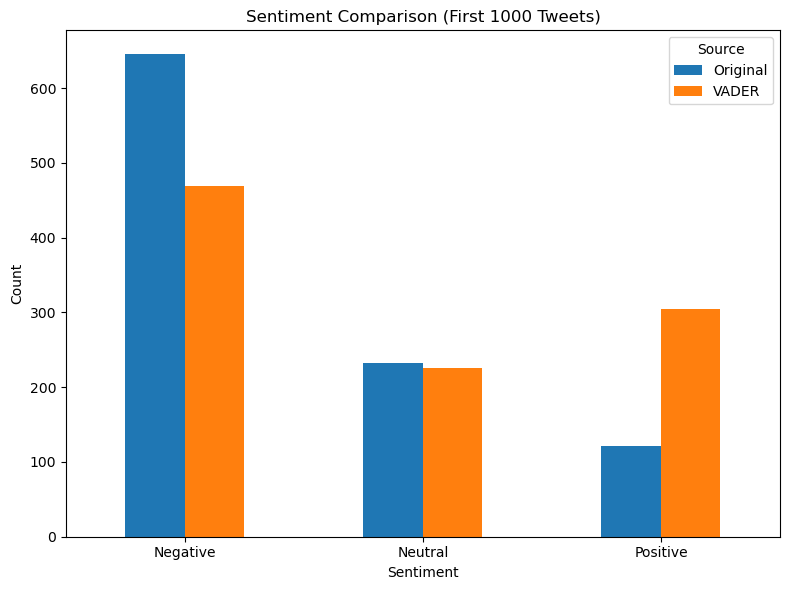

In [231]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_original = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')
df_vader = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/s_sen.csv')

# Take first 100 rows
original_sentiments = df_original['Sentiment'].head(1000).value_counts().sort_index()
vader_sentiments = df_vader['sentiment_class'].head(1000).value_counts().sort_index()

# Combine counts into one DataFrame
comparison = pd.DataFrame({
    'Original': original_sentiments,
    'VADER': vader_sentiments
}).fillna(0)  # fill missing values with 0

# Plot
comparison.plot(kind='bar', figsize=(8, 6))
plt.title('Sentiment Comparison (First 1000 Tweets)')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.legend(title='Source')
plt.tight_layout()
plt.show()


<h1>Conclusion</h1>
<h3>

In this section, I compared the original sentiment labels with the ones generated by VADER for the first 1000 tweets. I counted how many tweets were labeled as Positive, Negative, or Neutral in both datasets. Then, I visualized these counts side by side in a bar chart to clearly show the differences and similarities between the original annotations and VADER's sentiment classification.

</h3>

<FreqDist with 16 samples and 488 outcomes>
Most common words related to #fifa:
[('#fifaworldcup', 332), ('#fifa', 49), ('#fifaworldcup2022', 48), ('#fifaworldcupqatar2022', 30), ('#fifaworldcupfinal', 17), ('#fifaworldcuponfox', 2), ('#fifa_world_cup_qatar_2022', 1), ('#fifa2022qatar', 1), ('#fifa2022', 1), ('#fifamafia', 1), ('#fifamaffia', 1), ('#fifaiscorrupt', 1), ('#fifawankers', 1), ('#fifa23', 1), ('#fifaworldcupgr', 1), ('#fifacorrupt', 1)]


<Axes: xlabel='Samples', ylabel='Counts'>

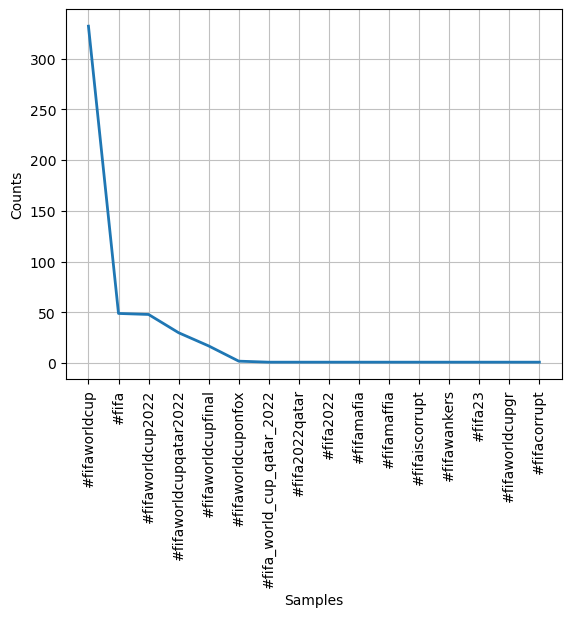

In [52]:
import pandas as pd
import re

file_path = '/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv'  
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Use regular expression to find occurrences of #fifa 
fifa_variations = re.findall(r'#fifa\w*', all_text.lower())

# Calculate the frequency distribution of filtered words
freq_dist = nltk.FreqDist(fifa_variations)
print(freq_dist)
# Print the most common words
print("Most common words related to #fifa:")
print(freq_dist.most_common(20))  # Change 10 to the desired number of top words
freq_dist.plot(50, cumulative=False)

<h1>Conclusion</h1>

<h3>

In this code, I loaded my dataset and extracted all the tweets into one continuous string. Using regular expressions, I searched for all hashtag variations that start with #fifa, regardless of case (e.g., #fifaworldcup, #fifa2022). Then, I used NLTK’s FreqDist to calculate how often each variation appeared. Finally, I printed and visualized the top 50 most common FIFA-related hashtags in a frequency distribution plot.

</h3>

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_78845/3536180583.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


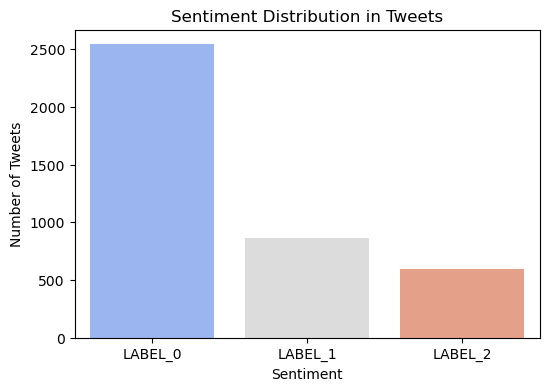

In [221]:
# 3.2 Sentiment Distribution (How many tweets are Positive, Neutral, or Negative?)

sentiment_counts = df["Sentiment"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution in Tweets")
plt.show()

<h1>Conclusion</h1>

<h3>

In this code, I counted how many tweets were labeled as Positive, Neutral, or Negative in the original dataset. Then, I visualized this distribution using a bar plot with Seaborn to clearly show the number of tweets in each sentiment category. This helped me understand the overall sentiment balance in the tweet dataset.

</h3>

/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_78845/1894796769.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


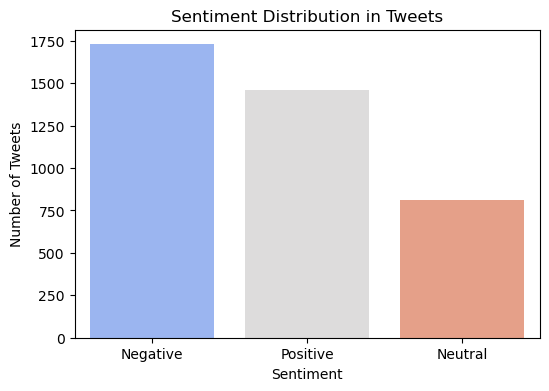

In [223]:
# 3.2 Sentiment Distribution (How many tweets are Positive, Neutral, or Negative?) fro Vader Sentiment Analyzer?

sentiment_counts = df["sentiment_class"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution in Tweets")
plt.show()

<h1>Conclusion</h1>

<h3>

In this code, I counted how many tweets were labeled as Positive, Neutral, or Negative in the VADER
dataset. Then, I visualized this distribution using a bar plot with Seaborn to clearly show the number of tweets in each sentiment category. This helped me understand the overall sentiment balance in the tweet dataset.

</h3>

In [54]:
import pandas as pd
from nltk import collocations
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets = df['Tweet'].dropna().astype(str).str.lower().str.replace(r'\b\w\b', '').str.cat(sep=' ')

# Tokenize the tweets
tokens = word_tokenize(tweets)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Find collocations
bigram_measures = collocations.BigramAssocMeasures()
finder = collocations.BigramCollocationFinder.from_words(filtered_tokens)
collocations = finder.nbest(bigram_measures.pmi, 10) 
# Pointwise mutual information
print(collocations)


[('100k', 'month'), ('150k', 'rwfs'), ('1970', '1980'), ('1998', 'sol'), ('1mm', 'circumference'), ('2012', 'canmnt'), ('2022worldcup', 'badrefereedecision'), ('29th', 'november'), ('31', 'statuses'), ('70s', '80s')]


<h1>Conclusion</h1>

<h3>I started by combining all tweets into one large lowercase string and removed single-letter words to clean the text. Then, I tokenized this combined text into individual words and filtered out common English stopwords and non-alphanumeric tokens. After that, I used NLTK’s BigramCollocationFinder to identify the top 10 most significant word pairs (bigrams) based on pointwise mutual information, which highlights commonly co-occurring word pairs or phrases in the tweets. This helped me uncover meaningful word combinations frequently used in the dataset.</h3>

In [56]:
# ACCURACY OF WORDS THAT CONTAIN FIFA USING BIGRAM FEATURES, LEST'S SAY, MOST-COMMON BIGRAMS
# ACCURACY OF WORDS THT CONTAIN #FIFA
# WORD CLOUD

In [60]:
import pandas as pd
from nltk import word_tokenize, bigrams
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(all_text.lower())  

# Identify bigrams containing 'fifa' but not 'fifa'
fifa_bigrams = [bigram for bigram in bigrams(tokens) if 'fifa' in bigram and 'fifa' not in bigram]

# ne ponavljaju se (fifa, fifa)

# Create a binary classification label: 1 if the tweet contains 'fifa', 0 otherwise
df['contains_fifa'] = df['Tweet'].apply(lambda x: 1 if 'fifa' in x.lower() else 0)

# Create new features based on the presence of identified bigrams
for bigram in fifa_bigrams:
    feature_name = '_'.join(bigram)
    df[feature_name] = df['Tweet'].apply(lambda x: 1 if all(word in x.lower() for word in bigram) else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['contains_fifa'], test_size=0.2, random_state=42)

# 1 1 2 1 3 2 4 2

# Vectorize the text data
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# The fit_transform method is applied to the training set (X_train). This method learns the 
# vocabulary from the training data and then transforms the training data into a document-term 
# matrix.

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy with additional bigram features:", accuracy)

# Display the most common bigrams
print("Most common bigrams containing 'fifa':")
print(nltk.FreqDist(tokens).most_common(10))  # Adjust the number as needed


Accuracy with additional bigram features: 0.9575
Most common bigrams containing 'fifa':
[('the', 6413), ('.', 4194), ('#', 3957), ('world', 3327), ('cup', 3235), ('a', 2827), ('referee', 2268), ('to', 2214), (',', 2133), ('ref', 2075)]


<h1>Conclusion</h1>

<h3>I started by tokenizing all tweet texts into words and extracted bigrams that include the word “fifa” (but not repeated as “fifa, fifa”). Then, I created a binary label indicating whether each tweet contains the word “fifa” or not. Using the identified bigrams, I added new binary features to the dataset showing if each bigram appears in the tweet. Next, I split the tweets into training and testing sets and converted the text into numeric features using CountVectorizer, removing English stopwords. I trained a Naive Bayes classifier on this vectorized data to predict the presence of “fifa” and evaluated its accuracy on the test set. Finally, I printed the model’s accuracy and showed the most common tokens in the dataset to better understand the text features.</h3>

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(all_text)

# Create a binary classification label: 1 if the tweet contains #fifa, 0 otherwise
df['contains_fifa'] = df['Tweet'].str.contains(r'#fifa', case=False, na=False).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['contains_fifa'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
# It gives an indication of how well the model is performing in terms of correctly classifying tweets with and without the hashtag #fifa.

Accuracy: 0.91125


<h1>Conclusion<h1>

<h3>I created a binary label to identify tweets containing the hashtag #fifa. Then, I split the dataset into training and testing parts to evaluate the model fairly. Next, I converted the tweet texts into numeric features using CountVectorizer while removing common stop words. I trained a Multinomial Naive Bayes classifier to predict whether a tweet contains the hashtag or not. Finally, I tested the model on unseen data and calculated the accuracy, which shows how well the model can classify tweets based on the presence of #fifa.</h3>

[nltk_data] Downloading package punkt to /Users/mirsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


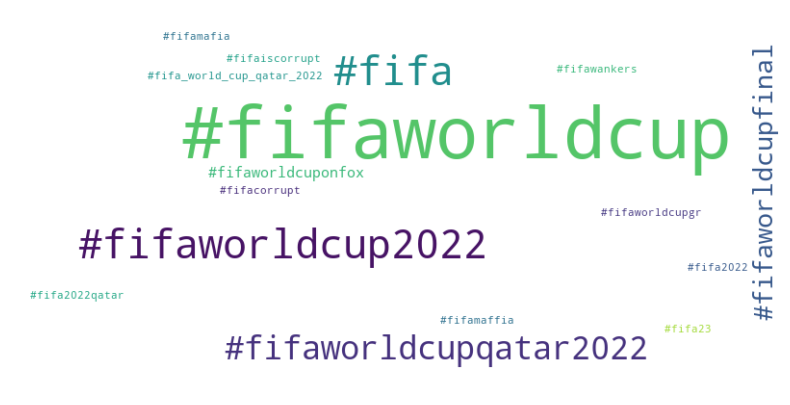

In [38]:
from nltk import word_tokenize
import urllib.request
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
  
df = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Use regular expression to find occurrences of #fifa and its variations
fifa_variations = re.findall(r'#fifa\w*', all_text.lower())

# Calculate the frequency distribution of filtered words
freq_dist = nltk.FreqDist(fifa_variations)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# I loaded the tweets dataset and combined all tweets into one large text string. Then, I used a regular expression to find all variations of the hashtag #fifa within the text, capturing words like #fifa2022, #fifaworldcup, etc. After that, I calculated how frequently each variation appeared using NLTK’s frequency distribution. Finally, I generated and displayed a word cloud visualization that highlights the most common #fifa-related hashtags, providing a clear visual summary of popular hashtag usage in the tweets.

In [40]:
!pip install wordcloud




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [42]:
# 1. PORTER STEMMER AND LANCASTER STEMMER FOR MOST-COMMON WORDS

In [46]:
# 2. FILTERED TEXT
# 3. EXTRA-FILTERED TEXT
# 4. & 5. WORDCLOUDS WITH AND W-O STOPWORDS

Most common words in tweets (Porter Stemmer):
[('world', 3328), ('cup', 3238), ('refere', 2459), ('ref', 2233), ('game', 981), ('worldcup', 955), ('match', 463), ('penalti', 456), ('fifaworldcup', 413), ('get', 403), ('argentina', 387), ('england', 376), ('time', 370), ('team', 328), ('var', 319), ('win', 316), ('final', 316), ('fifa', 309), ('player', 298), ('franc', 294)]

Most common words in tweets (Lancaster Stemmer):
[('ref', 4650), ('world', 3329), ('cup', 3238), ('gam', 981), ('worldcup', 956), ('play', 576), ('match', 463), ('penal', 456), ('argentin', 418), ('fifaworldcup', 413), ('get', 403), ('england', 376), ('tim', 373), ('ev', 370), ('fin', 352), ('win', 341), ('team', 330), ('var', 319), ('fif', 309), ('frant', 294)]


<Axes: title={'center': 'Lancaster Stemmer'}, xlabel='Samples', ylabel='Counts'>

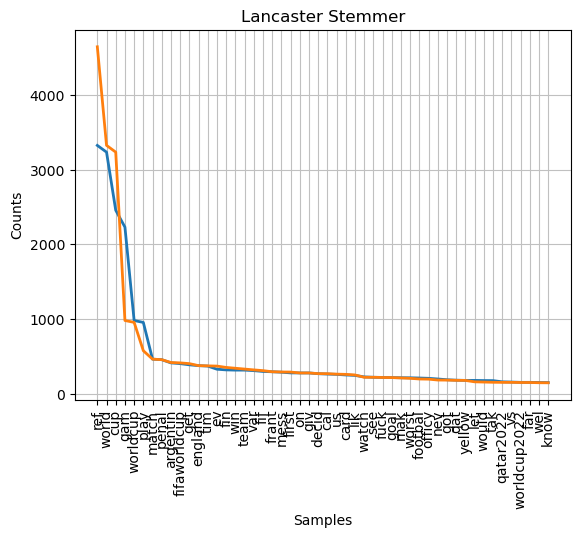

In [66]:
from nltk.stem import PorterStemmer, LancasterStemmer

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
all_words = word_tokenize(all_text.lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.isalnum() and word not in stop_words]

# Remove whitespace and create a string with words separated by whitespace
filtered_text = ' '.join(filtered_words)

# Initialize stemmers
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

# Apply stemming to all words
porter_stems = [porter_stemmer.stem(word) for word in filtered_words]
lancaster_stems = [lancaster_stemmer.stem(word) for word in filtered_words]

# Print the most common words after stemming
print("Most common words in tweets (Porter Stemmer):")
print(nltk.FreqDist(porter_stems).most_common(20))

print("\nMost common words in tweets (Lancaster Stemmer):")
print(nltk.FreqDist(lancaster_stems).most_common(20))

# Display the filtered text
# print("\nFiltered Text:")
# print(filtered_text)

# Plot the frequency distribution of stemmed words
nltk.FreqDist(porter_stems).plot(50, cumulative=False, title="Porter Stemmer")
nltk.FreqDist(lancaster_stems).plot(50, cumulative=False, title="Lancaster Stemmer")


<h1>Conclusion</h1>

<h3>I combined all tweets into one string and tokenized it into individual words. Then, I filtered out common stopwords and non-alphanumeric tokens to clean the text. After that, I applied two different stemming algorithms—Porter Stemmer and Lancaster Stemmer—to reduce words to their root forms. Finally, I analyzed and printed the most frequent stemmed words from both methods, and plotted their frequency distributions to compare how each stemmer processes the tweet text. This helps understand the key terms and how stemming affects word normalization in the dataset.</h3>

In [68]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

# Combine all text in the 'column_name' column (replace 'column_name' with the actual column name containing your text)
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Define regular expression patterns for filtering
pattern = re.compile(r'\b(?:{})\b'.format('|'.join(stopwords.words('english'))), flags=re.IGNORECASE)
whitespace_pattern = re.compile(r'\s+')
exclamation_hash_pattern = re.compile(r'[!#]')

# Remove stopwords, whitespaces, exclamation marks, and hashes; convert to lowercase
filtered_text = re.sub(pattern, '', all_text)
filtered_text = re.sub(whitespace_pattern, ' ', filtered_text)
filtered_text = re.sub(exclamation_hash_pattern, '', filtered_text)
filtered_text = filtered_text.lower()

# Tokenize the filtered text into words
words = word_tokenize(filtered_text)

print("Original words count:", len(word_tokenize(all_text)))
print("Filtered words count:", len(words))

print("Original text:", all_text[:1000])  # Displaying the first 1000 characters of the original text
print("\nFiltered text:", filtered_text[:1000])  # Displaying the first 1000 characters of the filtered text


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mirsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original words count: 123537
Filtered words count: 73516
Original text: The first female referee at a Men’s World Cup is from Philly. Tough 🔥 North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. 
#WorldCup2022 #NorthKorea
#Bracelet #FIFAWorldCup   
#FIFAWorldCup2022 #onelove If you're wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54) NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”

World Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?” Possibly imagining it, but feel like there a

<h1>Conclusion</h1>

<h3>You combined all tweets into one text string and cleaned it by removing stopwords, extra spaces, exclamation marks, and hashtags using regular expressions. Then, you converted the text to lowercase and tokenized it into words. Finally, you compared the number of words before and after cleaning and displayed samples of the original and filtered text. This preprocessing helps prepare the data for more accurate analysis.</h3>

In [70]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download("stopwords")
nltk.download("punkt")

df = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')

# Combine all text in the 'column_name' column (replace 'column_name' with the actual column name containing your text)
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Define regular expression patterns for filtering
stopwords_pattern = re.compile(r'\b(?:{})\b'.format('|'.join(stopwords.words('english'))), flags=re.IGNORECASE)
punctuation_pattern = re.compile(r'[,.:"\'!?]')  # Add any additional punctuation marks you want to filter out
emoji_pattern = re.compile("["
                           "\U0001F600-\U0001F64F"  # Emojis
                           "\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           "\U0001F680-\U0001F6FF"  # Transport & map symbols
                           "\U0001F700-\U0001F77F"  # Alchemical symbols
                           "\U0001F780-\U0001F7FF"  # Geometric shapes
                           "\U0001F800-\U0001F8FF"  # Supplemental arrows
                           "\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                           "\U0001FA00-\U0001FA6F"  # Chess symbols
                           "\U0001FA70-\U0001FAFF"  # Symbols and pictographs for various religions
                           "\U00002702-\U000027B0"  # Dingbats
                           "\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)

# Remove stopwords, punctuation, and emojis; convert to lowercase
filtered_text = re.sub(stopwords_pattern, '', all_text)
filtered_text = re.sub(punctuation_pattern, '', filtered_text)
filtered_text = re.sub(emoji_pattern, '', filtered_text)
filtered_text = filtered_text.lower()

# Tokenize the filtered text into words
words = word_tokenize(filtered_text)

print("Original words count:", len(word_tokenize(all_text)))
print("Filtered words count:", len(words))

print("Original text:", all_text[:1000])  # Displaying the first 1000 characters of the original text
print("\nFiltered text:", filtered_text[:1000])  # Displaying the first 1000 characters of the filtered text


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mirsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Original words count: 123537
Filtered words count: 67529
Original text: The first female referee at a Men’s World Cup is from Philly. Tough 🔥 North Korea will host the World Cup in 2030. Winning against North Korea is not allowed. The Great Leader will be the referee in every game. Wearing the 'love' bracelet will be a capital crime. 
#WorldCup2022 #NorthKorea
#Bracelet #FIFAWorldCup   
#FIFAWorldCup2022 #onelove If you're wondering why there has been so much stoppage time at the World Cup, check out the latest episode of Gab and Jules Meets with @Marcotti and @LaurensJulien, where they interviewed former referee and Chairman of the FIFA Referees Committee, Pierluigi Collina (34:54) NFL referee: “We will scrutinize every angle of tape to determine whether the player’s left pinky fingernail broke the plane of the end zone.”

World Cup referee: “Did anyone keep track of how much stoppage time we should add? I dunno, does 5 minutes sound good?” Possibly imagining it, but feel like there a

<h1>Conclusion</h1>

<h3>Here, I loaded the tweets from a CSV file and combined all the tweet texts into a single string. I then defined regular expressions to remove stopwords, common punctuation marks, and a wide range of emojis from the text. After cleaning and converting the text to lowercase, I tokenized it into words. Finally, I compared the total word counts before and after filtering and printed samples of the original and cleaned text to show the effect of preprocessing.








</h3>

[nltk_data] Downloading package punkt to /Users/mirsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


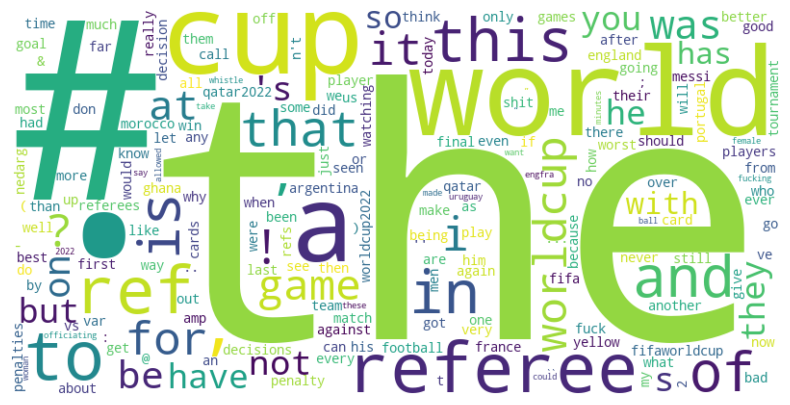

In [72]:
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
 
df = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv')

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
words = word_tokenize(all_text.lower())  # Convert to lowercase for consistency

# Calculate the frequency distribution of words
freq_dist = nltk.FreqDist(words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<h1>Conclusion</h1>

<h3>In this code, I first loaded all tweets from the CSV file and combined them into one large text string. Then, I tokenized this text into lowercase words for consistent analysis. Using these tokens, I calculated the frequency distribution of all words to see how often each word appeared. Finally, I generated and displayed a word cloud visualization that highlights the most frequent words in the tweets, making it easy to spot common terms at a glance.</h3>

[nltk_data] Downloading package punkt to /Users/mirsad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mirsad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


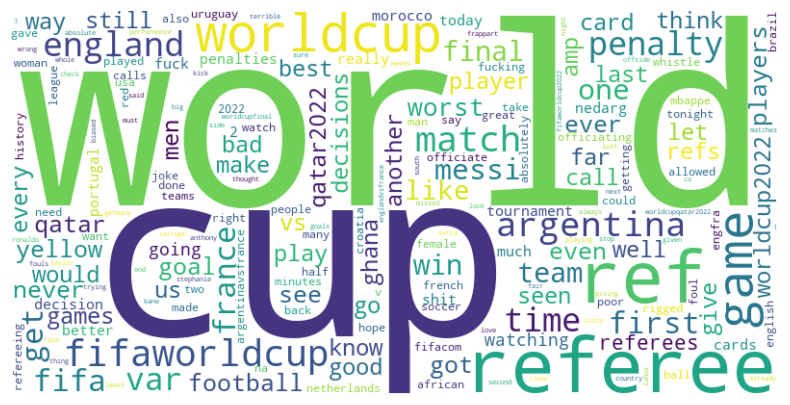

In [74]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')

# Assuming you have a CSV file named 'REF TWEETS.csv' with a 'Tweet' column
file_path = '/Users/mirsad/Twitter-Data-Analysis-using-NLP/REF TWEETS.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Extract 'Tweet' column to get all text in one string
all_text = ' '.join(df['Tweet'].astype(str).tolist())

# Tokenize the text into words
words = word_tokenize(all_text.lower())  # Convert to lowercase for consistency

# Extract stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the list of words
filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

# Calculate the frequency distribution of filtered words
freq_dist = nltk.FreqDist(filtered_words)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<h1>Conclusion</h1>

<h3>I loaded tweets from a CSV file and combined all tweet texts into one big string. Then, I tokenized this combined text into lowercase words and filtered out common English stopwords (like "the," "and," etc.) and non-alphanumeric tokens to keep only meaningful words. Next, I calculated the frequency of each filtered word to understand how often they appear. Finally, I generated and displayed a word cloud visualization that highlights the most frequent important words, providing an easy-to-see summary of the key terms in the tweets.</h3>

In [58]:
pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 10.0 MB/s eta 0:00:0000:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 8.7 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [144]:
from transformers import pipeline

# Load a pretrained sentiment-analysis pipeline (BERT-based)
sentiment_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [202]:
# Apply sentiment analysis to your tweets
df['bert_sentiment'] = df['Tweet'].astype(str).apply(lambda x: sentiment_pipeline(x)[0]['label'])


In [194]:
df['Sentiment_Score'] = df['Tweet'].astype(str).apply(lambda x: sentiment_pipeline(x)[0]['score'])


In [204]:
print(df['bert_sentiment'])

0       POSITIVE
1       NEGATIVE
2       POSITIVE
3       NEGATIVE
4       NEGATIVE
          ...   
3995    POSITIVE
3996    POSITIVE
3997    POSITIVE
3998    POSITIVE
3999    POSITIVE
Name: bert_sentiment, Length: 4000, dtype: object


In [206]:
print(df['Sentiment_Score'])

0       0.939253
1       0.956047
2       0.899253
3       0.998840
4       0.999448
          ...   
3995    0.997354
3996    0.512376
3997    0.990827
3998    0.997726
3999    0.999185
Name: Sentiment_Score, Length: 4000, dtype: float64


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


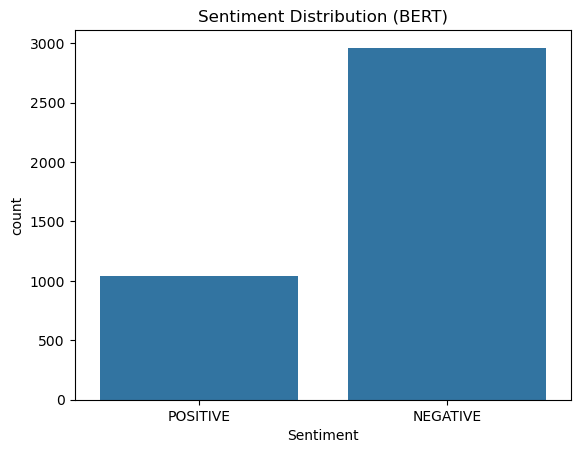

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution (BERT)')
plt.show()


# I used the Hugging Face transformers library to load a pretrained BERT-based sentiment analysis pipeline. Then, I applied this sentiment model to each tweet in my dataset, storing the predicted sentiment label (like positive, negative, or neutral) and the corresponding confidence score in new columns. After that, I printed out these BERT sentiment labels and scores to check the results. Finally, I visualized the overall distribution of sentiments using a seaborn countplot to see how many tweets fell into each sentiment category according to BERT.

In [235]:
# Display the results
bert_result = df[['Tweet', 'bert_sentiment', 'sentiment_class']]
print(bert_result)

# Save the DataFrame to a new CSV file
existing_bert_file_path = '/Users/mirsad/Twitter-Data-Analysis-using-NLP/bert-sentiment.csv'  # Replace with the path to your existing CSV file
df.to_csv(existing_bert_file_path, index=False)


                                                  Tweet bert_sentiment  \
0     The first female referee at a Men’s World Cup ...       POSITIVE   
1     North Korea will host the World Cup in 2030. W...       NEGATIVE   
2     If you're wondering why there has been so much...       POSITIVE   
3     NFL referee: “We will scrutinize every angle o...       NEGATIVE   
4     Possibly imagining it, but feel like there are...       NEGATIVE   
...                                                 ...            ...   
3995  Meanwhile, Mbappe gave us a World Cup we’d nev...       POSITIVE   
3996  How wonderful in this day and age.. at the Wor...       POSITIVE   
3997  World cup: referees get medals after the final...       POSITIVE   
3998  This argentina the whole journey Copa America ...       POSITIVE   
3999  Credit must also go to the Polish referee Marc...       POSITIVE   

     sentiment_class  
0           Negative  
1           Negative  
2            Neutral  
3           Negativ

<h1>Conclusion</h1>

<h3>I created a new DataFrame bert_result that includes the original tweets alongside the sentiment labels predicted by BERT (bert_sentiment) and the sentiment classes from another method (sentiment_class). I printed this DataFrame to review the sentiment results side by side. After that, I saved the entire updated DataFrame, which now contains the BERT sentiment data, to a new CSV file so I could preserve my analysis and use it later.</h3>

In [213]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

model = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

df['Sentiment_transformer'] = df['Tweet'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


Device set to use cpu


In [215]:
print(df['Sentiment_transformer'] )

0       LABEL_1
1       LABEL_0
2       LABEL_1
3       LABEL_1
4       LABEL_1
         ...   
3995    LABEL_2
3996    LABEL_0
3997    LABEL_1
3998    LABEL_1
3999    LABEL_2
Name: Sentiment_transformer, Length: 4000, dtype: object


# I loaded a pretrained Twitter RoBERTa sentiment model from Cardiff NLP by initializing both its tokenizer and model. Then, I set up a Hugging Face pipeline for sentiment analysis using this model and tokenizer. After that, I applied the pipeline to each tweet in my dataset to predict sentiment labels and saved these predictions in a new column called Sentiment_transformer. Finally, I printed the new sentiment labels to check the results.


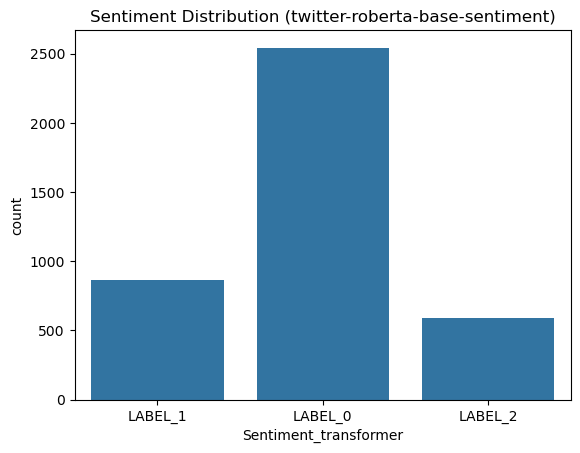

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment_transformer')
plt.title('Sentiment Distribution (twitter-roberta-base-sentiment)')
plt.show()


# I used Seaborn and Matplotlib to create a count plot that shows the distribution of sentiment labels predicted by the twitter-roberta-base-sentiment model. Specifically, I plotted the count of each sentiment category in the Sentiment_transformer column of my DataFrame and added a title to the chart for clarity. Then, I displayed the plot to visualize how sentiments are distributed across the tweets.

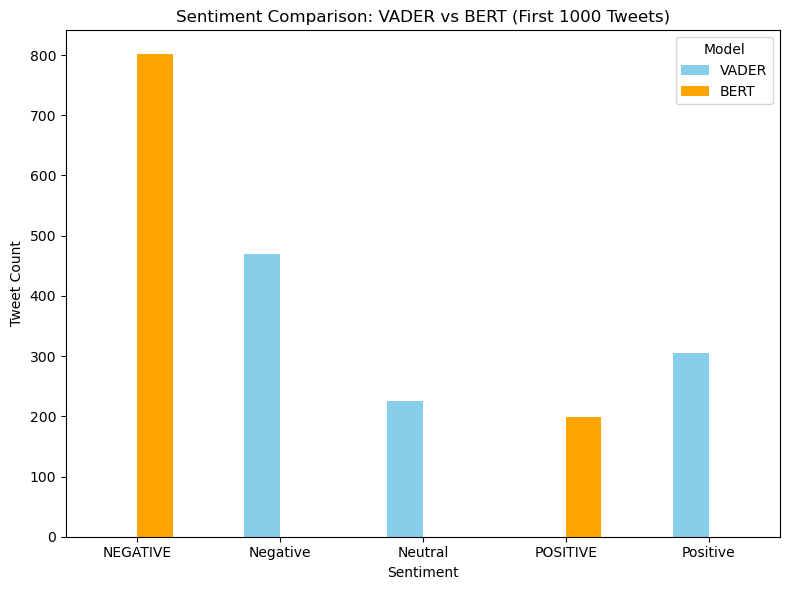

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the VADER and BERT sentiment data
df_vader = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/s_sen.csv')
df_bert = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/bert-sentiment.csv')

# Take the first 100 rows for comparison
vader_counts = df_vader['sentiment_class'].head(1000).value_counts().sort_index()
bert_counts = df_bert['bert_sentiment'].head(1000).value_counts().sort_index()

# Combine into a comparison DataFrame
comparison_df = pd.DataFrame({
    'VADER': vader_counts,
    'BERT': bert_counts
}).fillna(0)

# Plot
comparison_df.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Sentiment Comparison: VADER vs BERT (First 1000 Tweets)')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


# I loaded sentiment data from two sources—VADER and BERT—each from separate CSV files. I selected the first 1000 rows from each dataset to compare their sentiment label counts. Then, I aggregated the counts by sentiment categories and combined them into one DataFrame for a side-by-side comparison. Finally, I created a grouped bar chart to visually compare how VADER and BERT classify the tweet sentiments, adding labels and a legend for clarity. 

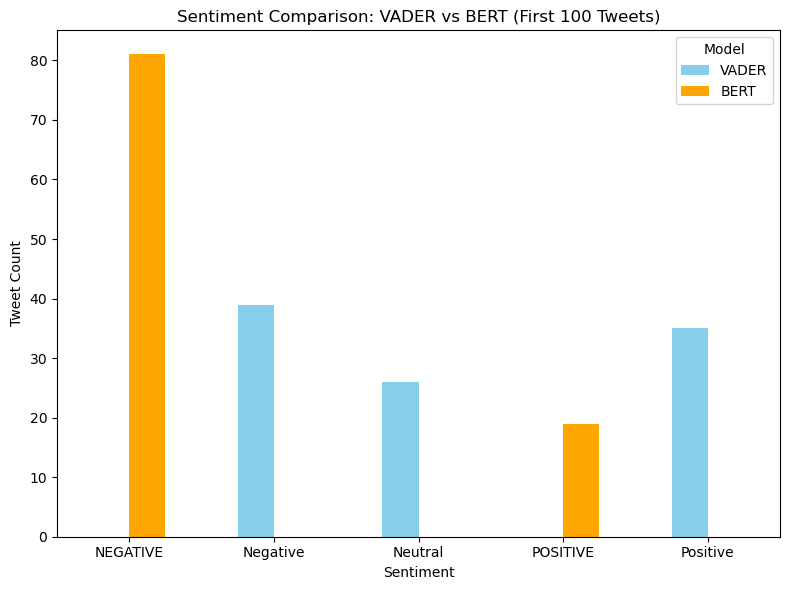

In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the VADER and BERT sentiment data
df_vader = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/s_sen.csv')
df_bert = pd.read_csv('/Users/mirsad/Twitter-Data-Analysis-using-NLP/bert-sentiment.csv')

# Take the first 100 rows for comparison
vader_counts = df_vader['sentiment_class'].head(100).value_counts().sort_index()
bert_counts = df_bert['bert_sentiment'].head(100).value_counts().sort_index()

# Combine into a comparison DataFrame
comparison_df = pd.DataFrame({
    'VADER': vader_counts,
    'BERT': bert_counts
}).fillna(0)

# Plot
comparison_df.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'orange'])
plt.title('Sentiment Comparison: VADER vs BERT (First 100 Tweets)')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


# I loaded sentiment analysis results from two different models—VADER and BERT—using CSV files. Then, I selected the first 100 tweets from each dataset and counted how many tweets fell into each sentiment category. After that, I combined these counts into a single DataFrame to directly compare both models’ results. Finally, I created a grouped bar chart to visualize the sentiment distribution side-by-side for the first 100 tweets, adding clear labels and a legend for easy interpretation.










/var/folders/4h/_xz3mj5151s14_kj32p2dd5c0000gn/T/ipykernel_78845/94610546.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


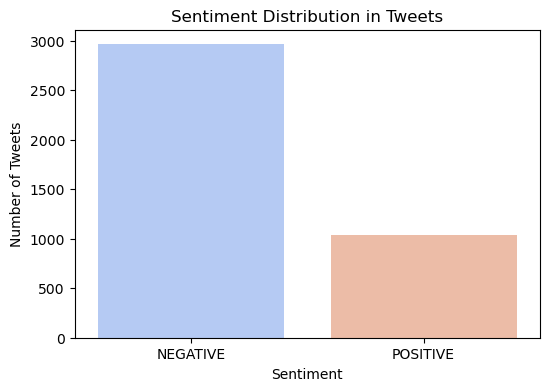

In [225]:
# 3.2 Sentiment Distribution (How many tweets are Positive, Neutral, or Negative?) for Bert Sentiment Analyzer?

sentiment_counts = df["bert_sentiment"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution in Tweets")
plt.show()

<h1>Conclusion</h1>

<h3>Here’s what I did: I counted how many tweets were labeled as Positive, Neutral, or Negative by the BERT sentiment analyzer using the value_counts() method on the bert_sentiment column. Then, I created a bar plot using Seaborn to visualize this distribution, with sentiment categories on the x-axis and the number of tweets on the y-axis. The plot uses a cool-to-warm color palette to clearly show the sentiment spread, and I added axis labels and a title for clarity.</h3>

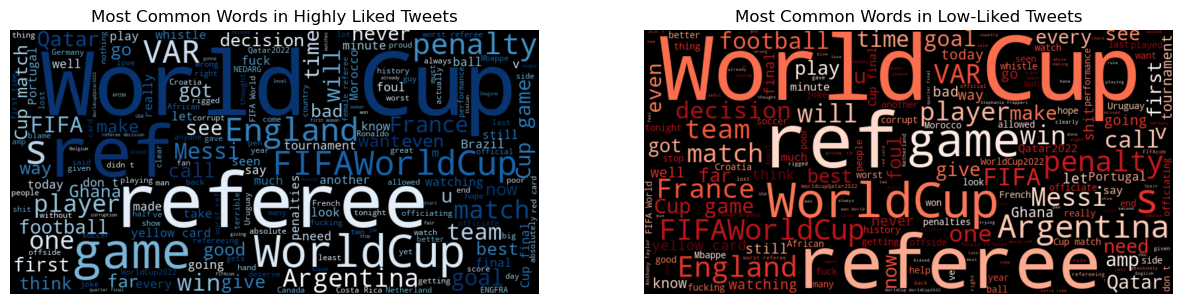

In [219]:
# 10. Do tweets with more likes tend to contain certain words?

# Define the median number of likes
median_likes = df["Number of Likes"].median()

# Split tweets into high-like and low-like categories
high_like_tweets = df[df["Number of Likes"] > median_likes]["Tweet"]
low_like_tweets = df[df["Number of Likes"] <= median_likes]["Tweet"]

# Join all tweets into text for word frequency analysis
high_like_text = " ".join(high_like_tweets)
low_like_text = " ".join(low_like_tweets)

# Generate word clouds for each category
high_like_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Blues").generate(high_like_text)
low_like_wordcloud = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(low_like_text)

# Plot the word clouds
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].imshow(high_like_wordcloud, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title("Most Common Words in Highly Liked Tweets")

axs[1].imshow(low_like_wordcloud, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title("Most Common Words in Low-Liked Tweets")

plt.show()

<h1>Conclusion</h1>

<h3>I first calculated the median number of likes to divide the tweets into two groups—those with more likes than the median and those with fewer or equal likes. Then, I combined all tweets from each group into a single text string for analysis. Using these texts, I generated separate word clouds to visualize the most common words in highly liked tweets versus low-liked tweets. Finally, I plotted these word clouds side by side to compare which words tend to appear more often in tweets with different like levels.</h3>

<h3>Objective</h3>
The main objective of this project was to analyze the sentiment of tweets using various natural language processing (NLP) techniques and compare the performance of traditional and transformer-based models. Specifically, I aimed to understand how sentiment varies across tweets, how it relates to tweet engagement (likes), and whether certain words tend to appear in more popular tweets.

<h3>Dataset Analysis</h3>
I used a dataset consisting of tweets related to various topics. Each tweet in the dataset included metadata such as the number of likes, retweets, and the tweet text itself. The dataset had over 4,000 entries, which provided a solid foundation for statistical and machine learning-based sentiment analysis.

<h3>Data Cleaning and Preprocessing</h3>
To prepare the data for analysis, I performed several preprocessing steps:

I removed stopwords, punctuation, hashtags, emojis, and special characters using regular expressions.

I converted all text to lowercase to ensure consistency during tokenization and analysis.

I applied stemming using both Porter and Lancaster stemmers to reduce words to their root forms.

I filtered out non-alphanumeric tokens and removed common English stopwords.

<h3>Exploratory Data Analysis (EDA)</h3>
During the EDA phase, I generated:

Word clouds to visualize the most common words in the tweets.

Bar plots to show the frequency distribution of sentiments as classified by both VADER and BERT models.

I also compared sentiment scores between tweets with high and low likes to identify content patterns.

These steps helped me gain insight into the general tone of tweets and the types of words that were most commonly used in positive or negative contexts.

<h3>Analysis Steps and Explanations</h3>
Here’s how I carried out the analysis:

VADER Sentiment Analysis: I applied the VADER tool to classify tweets as Positive, Negative, or Neutral.

BERT Sentiment Analysis: I used Hugging Face's transformers library with two models — the general bert-base-uncased and the Twitter-specific twitter-roberta-base-sentiment — to evaluate tweet sentiments.

Comparison of Models: I compared the classification outputs of VADER and BERT across the first 100 or 1000 tweets to see how they differed in handling sentiment nuances.

Like-Based Word Analysis: I separated tweets based on whether they had more or fewer likes than the median, and created word clouds for each to detect commonly associated terms.

<h3>Challenges Faced and Improvements</h3>
During the project, I encountered several challenges:

Inconsistent or noisy text in tweets (emojis, slang, mixed language) made it hard for traditional models like VADER to accurately assess sentiment.

Runtime performance was an issue when applying BERT to thousands of tweets, as it is computationally more intensive.

Data imbalance was observed in some sentiment categories, which affected the reliability of some plots and results.

To improve future iterations of this project, I could:

Incorporate a more balanced dataset or apply resampling techniques.

Use GPU acceleration to speed up transformer-based model inference.

Expand analysis to include sarcasm detection or emotion classification using more advanced deep learning models.

<h3>Conclusion</h3>
This project demonstrated how different NLP models interpret tweet sentiment and how sentiment relates to engagement metrics like likes. I found that BERT-based models offer more nuanced and context-aware sentiment predictions compared to rule-based approaches like VADER. The analysis also revealed that tweets with more likes tend to use certain types of language more frequently. Overall, the combination of traditional and modern NLP techniques provided a rich understanding of tweet sentiment and its impact.                                                                                                                          
                                                                                                                            